In [71]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

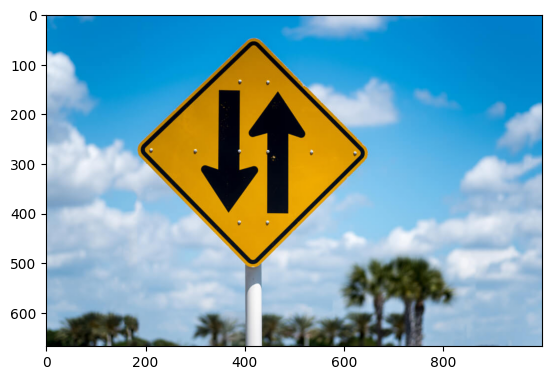

In [72]:
# Load Image
img = cv2.imread('Source/sign.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)

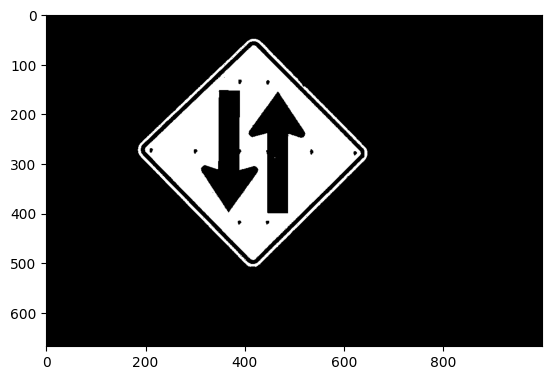

In [73]:
# Extract color
upper_sign = (25, 255, 255)
lower_sign = (0, 200, 100)

# Create mask for region
mask_gray = cv2.inRange(img_hsv, lower_sign, upper_sign)
mask = cv2.cvtColor(mask_gray, cv2.COLOR_GRAY2RGB)

# Display
plt.imshow(mask)

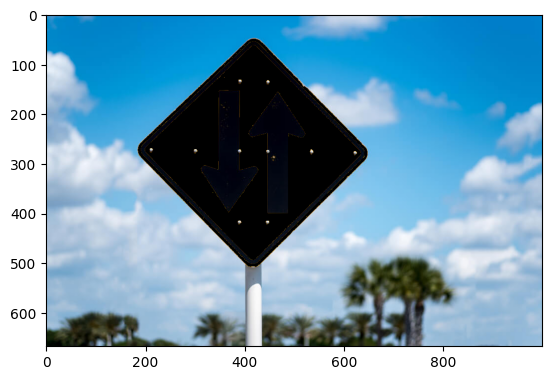

In [74]:
# Mask out the sign
outer = cv2.bitwise_not(mask)
bg = cv2.bitwise_and(img, outer)

plt.imshow(bg)


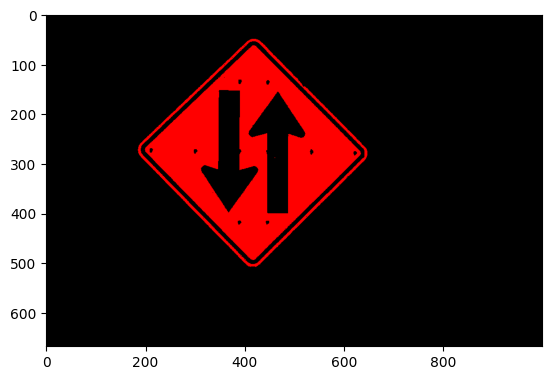

In [75]:
# Recolor Sign
r = np.uint8(mask_gray * 1)
g = np.uint8(mask_gray * 0)
b = np.uint8(mask_gray * 0)

sign_rgb = cv2.merge([r, g, b])

plt.imshow(sign_rgb)

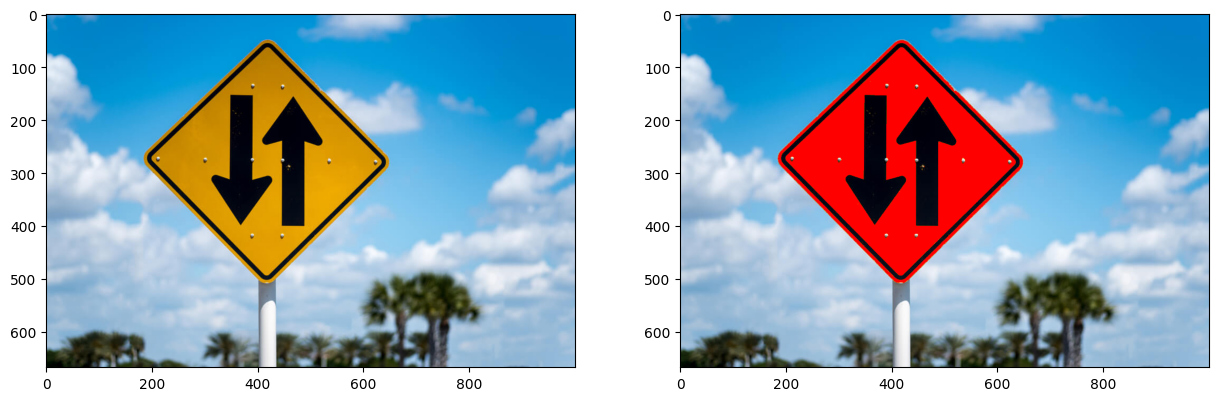

In [76]:
# Combine image
result = bg + sign_rgb


# Display
plt.figure(figsize= (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(result)

plt.show()